# Building Models

In [1]:
import numpy as np
import pandas as pd
import pickle
from tqdm import tqdm

## Postprocessing

Ideally I would import the postprocessing object and use that for analysis -- but snakemake takes way too long to compute the DAG. Here I will process it myself, but using the snakemake scripts.

In [2]:
import os 
os.chdir('/sietch_colab/akapoor/Demographic_Inference')

In [3]:
from snakemake_scripts.postprocessing import postprocessing

In [4]:
experiment_config = '/sietch_colab/akapoor/Demographic_Inference/experiment_config.json'
training_features = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/training_features.csv'
training_targets = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/training_targets.csv'
validation_features = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/validation_features.csv'
validation_targets = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/validation_targets.csv'

In [5]:
postprocessing_dict = postprocessing(experiment_config, training_features, training_targets, validation_features, validation_targets)


Processing training data:
===> Normalizing the data.

Processing validation data:
===> Normalizing the data.


In [6]:
# Save the postprocessing_dict
with open('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/postprocessing_dict.pkl', 'wb') as f:
    pickle.dump(postprocessing_dict, f)

In [7]:
train_features = postprocessing_dict['training']['predictions']
train_targets = postprocessing_dict['training']['normalized_targets']
validation_features = postprocessing_dict['validation']['predictions']
validation_targets = postprocessing_dict['validation']['normalized_targets']

In [8]:
from snakemake_scripts.extracting_features import getting_the_features
postprocessing_dict_filepath = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/postprocessing_dict.pkl'
sim_directory = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2'

getting_the_features(postprocessing_dict_filepath, sim_directory)

dict_keys(['parameter_names', 'target_names', 'training', 'validation'])
Training features shape: (4000, 49)
Validation features shape: (1000, 49)
Training targets shape: (4000, 5)
Validation targets shape: (1000, 5)


## Model 0: MomentsLD features only

In [63]:
experiment_directory = 'model0_results'
experiment_config_path = '/sietch_colab/akapoor/Demographic_Inference/experiment_config.json'
model_directory = experiment_directory
model_config_file = '/sietch_colab/akapoor/Demographic_Inference/model_config.json'
color_shades = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/color_shades.pkl'
main_colors = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/main_colors.pkl'

In [64]:
os.makedirs(experiment_directory, exist_ok=True)

First remove the log likelihood features and the FIM features

In [65]:
train_features

,Moments_rep1_Na,Moments_rep1_N1,Moments_rep1_N2,Moments_rep1_t_split,Moments_rep1_m,Moments_rep1_ll,Moments_rep1_FIM_element_0,Moments_rep1_FIM_element_1,Moments_rep1_FIM_element_2,Moments_rep1_FIM_element_3,...,Dadi_rep2_N1,Dadi_rep2_N2,Dadi_rep2_t_split,Dadi_rep2_m,Dadi_rep2_ll,MomentsLD_N1,MomentsLD_N2,MomentsLD_t_split,MomentsLD_m,MomentsLD_Na
Sim_0,18312.940893,1962.993363,8799.887484,2017.692859,NaN,-47775.332252,-3.096293e+07,-2.350519e+05,3.268639e+07,-280032.273433,...,2305.214366,4579.664504,1048.861969,NaN,-15387.674793,3772.592111,6149.382967,1952.713335,5.410461e-07,18340.982292
Sim_1,17199.757558,3675.237517,7626.385955,1614.606744,NaN,-186936.798841,-5.833645e+06,-4.010803e+05,2.463077e+07,0.000000,...,4025.421201,3932.098932,3189.450839,NaN,-63789.098979,9670.775190,3809.999622,3034.968035,5.314941e-07,18475.007366
Sim_2,14424.877778,2037.055635,7626.385955,1167.047345,NaN,-132599.969905,-3.580451e+07,-7.269977e+05,9.400295e+07,-112331.240567,...,2324.022921,8218.992792,1609.952074,NaN,-91385.579362,9106.083961,7921.145834,3879.015464,4.773448e-07,19964.370869
Sim_3,14037.174409,1351.364942,8194.071424,948.369102,NaN,-12142.984030,-2.200687e+07,-2.195852e+05,4.775351e+07,-104314.546589,...,2788.616759,6631.887628,1222.623864,NaN,-12212.093743,1896.365453,6803.138211,1126.946015,7.476578e-07,14195.576973
Sim_4,11751.536265,2175.665686,6119.424600,1586.366195,NaN,-65579.572102,-7.145964e+06,-1.014322e+05,8.393800e+06,-108700.122201,...,1482.091042,2911.869288,714.133761,NaN,-53762.001157,7364.649220,3765.812916,1651.710342,1.014999e-06,15005.820367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sim_3995,14246.808111,2457.608225,7626.385955,1691.199547,NaN,-39290.044466,-9.138877e+06,-6.551062e+04,1.341683e+07,-122959.387681,...,1665.397782,9300.392127,715.574421,NaN,-36317.474290,5702.130219,9196.466011,1874.630489,7.137621e-07,13671.773958
Sim_3996,15678.876016,1016.565518,7626.385955,797.525852,NaN,-96296.410871,-8.573738e+07,-5.022361e+04,1.099910e+08,-265760.977638,...,4487.696668,4648.809970,2048.282272,NaN,-22499.650080,2966.689740,5473.524548,941.981215,6.004355e-07,17148.553463
Sim_3997,12897.416422,2788.273579,7626.385955,1354.518860,NaN,-139778.875604,-4.981668e+06,-1.559490e+05,1.502321e+07,-88335.000761,...,3849.067681,2362.399052,2521.918619,NaN,-58196.601943,9848.646604,4299.149542,2877.147793,7.379718e-07,12649.602219
Sim_3998,12448.976931,1454.054429,6088.051289,1708.205831,NaN,-68544.362925,-1.720310e+07,-3.362811e+05,1.692437e+07,0.000000,...,2559.803095,1688.087105,641.991929,NaN,-85135.911749,5172.524489,4746.217267,3615.260545,9.339483e-07,11317.675001


In [66]:
# Drop columns with "_m", "FIM", or "ll" in their names
train_features_mdl0 = train_features[
    train_features.columns[train_features.columns.str.contains('MomentsLD', case=False)]
]
validation_features_mdl0 = validation_features[
    validation_features.columns[validation_features.columns.str.contains('MomentsLD', case=False)]
]

In [68]:
train_targets_mdl0 = train_targets[
    train_targets.columns[~train_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

validation_targets_mdl0 = validation_targets[
    validation_targets.columns[~validation_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

In [69]:
train_features_mdl0

,MomentsLD_N1,MomentsLD_N2,MomentsLD_t_split,MomentsLD_m,MomentsLD_Na
Sim_0,3772.592111,6149.382967,1952.713335,5.410461e-07,18340.982292
Sim_1,9670.775190,3809.999622,3034.968035,5.314941e-07,18475.007366
Sim_2,9106.083961,7921.145834,3879.015464,4.773448e-07,19964.370869
Sim_3,1896.365453,6803.138211,1126.946015,7.476578e-07,14195.576973
Sim_4,7364.649220,3765.812916,1651.710342,1.014999e-06,15005.820367
...,...,...,...,...,...
Sim_3995,5702.130219,9196.466011,1874.630489,7.137621e-07,13671.773958
Sim_3996,2966.689740,5473.524548,941.981215,6.004355e-07,17148.553463
Sim_3997,9848.646604,4299.149542,2877.147793,7.379718e-07,12649.602219
Sim_3998,5172.524489,4746.217267,3615.260545,9.339483e-07,11317.675001


In [70]:
import pickle
with open(f'/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/features_and_targets.pkl', 'rb') as f:
    features_and_targets = pickle.load(f)

In [71]:
features_and_targets['training']['features'] = train_features_mdl0.to_numpy()
features_and_targets['validation']['features'] = validation_features_mdl0.to_numpy()

In [72]:
features_and_targets['training']['targets'] = train_targets_mdl0.to_numpy()
features_and_targets['validation']['targets'] = validation_targets_mdl0.to_numpy()

In [73]:
# Save the updated features and targets
with open(f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl', 'wb') as f:
    pickle.dump(features_and_targets, f)

In [74]:
features_file = f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl'

In [75]:
from snakemake_scripts.linear_evaluation import linear_evaluation

PREDICTIONS SHAPE TRAINING: (4000, 4)
Maximum Value for y_true: 1.7317008983148228
Maximum Value for y_pred: 1.7408590488897708
Minimum Value for y_true: -1.7320508075688772
Minimum Value for y_pred: -3.0888513542877254
[0.00665468 0.00314654 0.00101058 ... 0.00998618 0.00671254 0.41805287]
Maximum Value for y_true: 1.7313509890607686
Maximum Value for y_pred: 1.7955657571375738
Minimum Value for y_true: -1.729929929028997
Minimum Value for y_pred: -3.4356388798937525
[2.27000825e-02 1.56763190e-02 5.66426724e-03 2.16687012e-03
 6.79609180e-01 9.37018584e-03 5.53638203e-03 4.31159604e-03
 7.50654038e-03 1.10810047e-02 8.24278144e-04 2.43290796e-02
 1.88340548e-02 6.33324229e-03 7.43501608e-03 1.97884093e-02
 1.99084318e-02 3.12120394e-03 4.90780410e-03 1.48184092e-03
 1.65296595e-02 1.78440214e-02 3.97438636e-02 1.81731251e-02
 3.28781297e-02 5.29495661e-01 2.69185695e-03 2.02801684e-03
 3.30074082e-03 5.36392391e-03 1.48405471e-02 3.41828580e-01
 1.41059338e-02 3.85886699e-03 4.785344

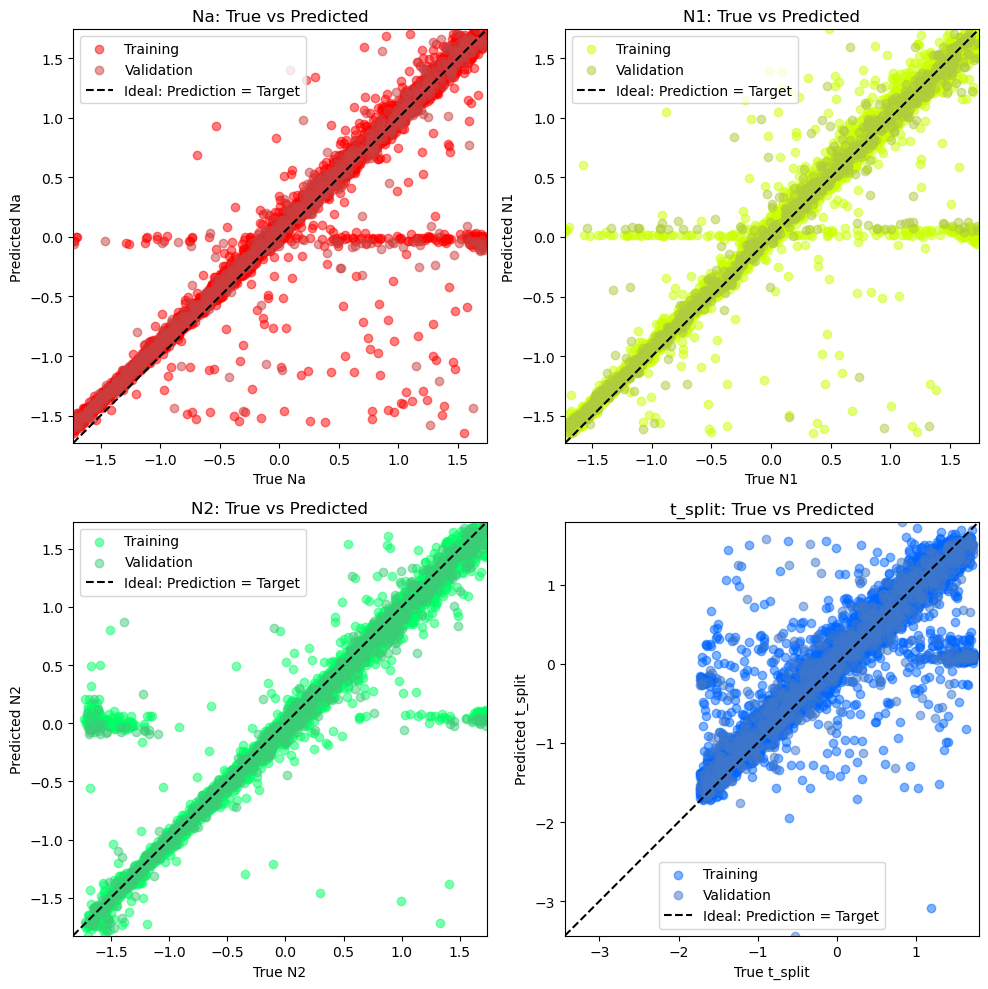

Linear model trained LFG


In [76]:
linear_evaluation(features_and_targets_filepath = features_file, model_directory = model_directory, model_config_path = model_config_file, color_shades_path = color_shades, main_colors_path = main_colors)

## Model 1: Moments, Dadi, MomentsLD features only

In [ ]:
experiment_directory = 'model1_results'
experiment_config_path = '/sietch_colab/akapoor/Demographic_Inference/experiment_config.json'
model_directory = experiment_directory
model_config_file = '/sietch_colab/akapoor/Demographic_Inference/model_config.json'
color_shades = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/color_shades.pkl'
main_colors = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/main_colors.pkl'

In [10]:
os.makedirs(experiment_directory, exist_ok=True)

First remove the log likelihood features and the FIM features

In [11]:
# Drop columns with "_m", "FIM", or "ll" in their names
train_features_mdl1 = train_features[
    train_features.columns[~train_features.columns.str.contains(r'_m|FIM|ll', case=False, regex=True)]
]
validation_features_mdl1 = validation_features[
    validation_features.columns[~validation_features.columns.str.contains(r'_m|FIM|ll', case=False, regex=True)]
]


In [12]:
train_targets_mdl1 = train_targets[
    train_targets.columns[~train_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

validation_targets_mdl1 = validation_targets[
    validation_targets.columns[~validation_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

In [13]:
train_features_mdl1

,Moments_rep1_Na,Moments_rep1_N1,Moments_rep1_N2,Moments_rep1_t_split,Moments_rep2_Na,Moments_rep2_N1,Moments_rep2_N2,Moments_rep2_t_split,Dadi_rep1_Na,Dadi_rep1_N1,Dadi_rep1_N2,Dadi_rep1_t_split,Dadi_rep2_Na,Dadi_rep2_N1,Dadi_rep2_N2,Dadi_rep2_t_split,MomentsLD_N1,MomentsLD_N2,MomentsLD_t_split,MomentsLD_Na
Sim_0,18312.940893,1962.993363,8799.887484,2017.692859,15914.499775,1463.202844,7811.491921,1269.991926,18022.110490,3071.363055,5226.096672,1349.084944,18527.519346,2305.214366,4579.664504,1048.861969,3772.592111,6149.382967,1952.713335,18340.982292
Sim_1,17199.757558,3675.237517,7626.385955,1614.606744,18971.102215,1932.964963,9893.088925,1522.724471,15381.505846,2865.370168,2249.617907,1269.686473,15405.515981,4025.421201,3932.098932,3189.450839,9670.775190,3809.999622,3034.968035,18475.007366
Sim_2,14424.877778,2037.055635,7626.385955,1167.047345,14308.946453,1585.637800,7811.491921,2359.169322,15381.505846,3856.348017,7874.060437,1968.364800,15405.515981,2324.022921,8218.992792,1609.952074,9106.083961,7921.145834,3879.015464,19964.370869
Sim_3,14037.174409,1351.364942,8194.071424,948.369102,12900.812764,1341.681208,7811.491921,1614.834083,12842.751646,2382.868553,9285.348559,1260.589153,13340.607449,2788.616759,6631.887628,1222.623864,1896.365453,6803.138211,1126.946015,14195.576973
Sim_4,11751.536265,2175.665686,6119.424600,1586.366195,10627.963132,1757.097052,7811.491921,868.999887,13285.450777,2528.819676,2900.213899,1570.031725,12811.783893,1482.091042,2911.869288,714.133761,7364.649220,3765.812916,1651.710342,15005.820367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sim_3995,14246.808111,2457.608225,7626.385955,1691.199547,13358.017244,2691.643172,7811.491921,861.598325,16410.621192,2567.596204,3353.713922,971.259473,14533.375402,1665.397782,9300.392127,715.574421,5702.130219,9196.466011,1874.630489,13671.773958
Sim_3996,15678.876016,1016.565518,7626.385955,797.525852,16197.261810,1068.079087,7811.491921,1063.777209,15765.335999,1918.485019,9029.333236,649.409939,14424.424877,4487.696668,4648.809970,2048.282272,2966.689740,5473.524548,941.981215,17148.553463
Sim_3997,12897.416422,2788.273579,7626.385955,1354.518860,12745.683084,1953.042542,7811.491921,1829.063835,15494.051442,3280.193463,4115.242375,1820.489921,17778.358790,3849.067681,2362.399052,2521.918619,9848.646604,4299.149542,2877.147793,12649.602219
Sim_3998,12448.976931,1454.054429,6088.051289,1708.205831,11226.371260,1021.344278,7811.491921,971.585428,15480.859588,2098.904044,2523.947585,2336.547004,12625.489605,2559.803095,1688.087105,641.991929,5172.524489,4746.217267,3615.260545,11317.675001


In [18]:
import pickle
with open(f'/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/features_and_targets.pkl', 'rb') as f:
    features_and_targets = pickle.load(f)

In [19]:
features_and_targets['training']['features'] = train_features_mdl1.to_numpy()
features_and_targets['validation']['features'] = validation_features_mdl1.to_numpy()

In [20]:
features_and_targets['training']['targets'] = train_targets_mdl1.to_numpy()
features_and_targets['validation']['targets'] = validation_targets_mdl1.to_numpy()

In [21]:
# Save the updated features and targets
with open(f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl', 'wb') as f:
    pickle.dump(features_and_targets, f)

In [ ]:
features_file = f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl'

In [23]:
from snakemake_scripts.linear_evaluation import linear_evaluation

PREDICTIONS SHAPE TRAINING: (4000, 4)
Maximum Value for y_true: 1.7317008983148228
Maximum Value for y_pred: 2.1539752530900023
Minimum Value for y_true: -1.7320508075688772
Minimum Value for y_pred: -2.178942153138286
[0.00593853 0.00608742 0.13125519 ... 0.0129986  0.00693948 0.54033356]
Maximum Value for y_true: 1.7313509890607686
Maximum Value for y_pred: 2.0084406900165765
Minimum Value for y_true: -1.729929929028997
Minimum Value for y_pred: -2.242044643797603
[2.01595941e-02 4.32081079e-03 5.23994581e-02 2.03039445e-02
 6.73570125e-01 1.35248911e-02 5.07201162e-02 7.27738388e-03
 3.77765993e-02 1.11661195e-02 1.00623930e-02 3.63698669e-02
 5.85195354e-02 6.87504987e-03 2.77968833e-02 7.67947054e-02
 9.79976001e-03 3.83630123e-02 1.18889974e-02 4.69942565e-02
 5.30169650e-03 3.29318898e-02 6.73678535e-02 1.76059254e-02
 4.16461059e-02 5.14978319e-01 1.99976557e-02 1.14799288e-02
 4.17347707e-02 5.45657952e-03 2.12305771e-01 2.59887355e-01
 3.30315179e-02 2.54920661e-02 1.07538205

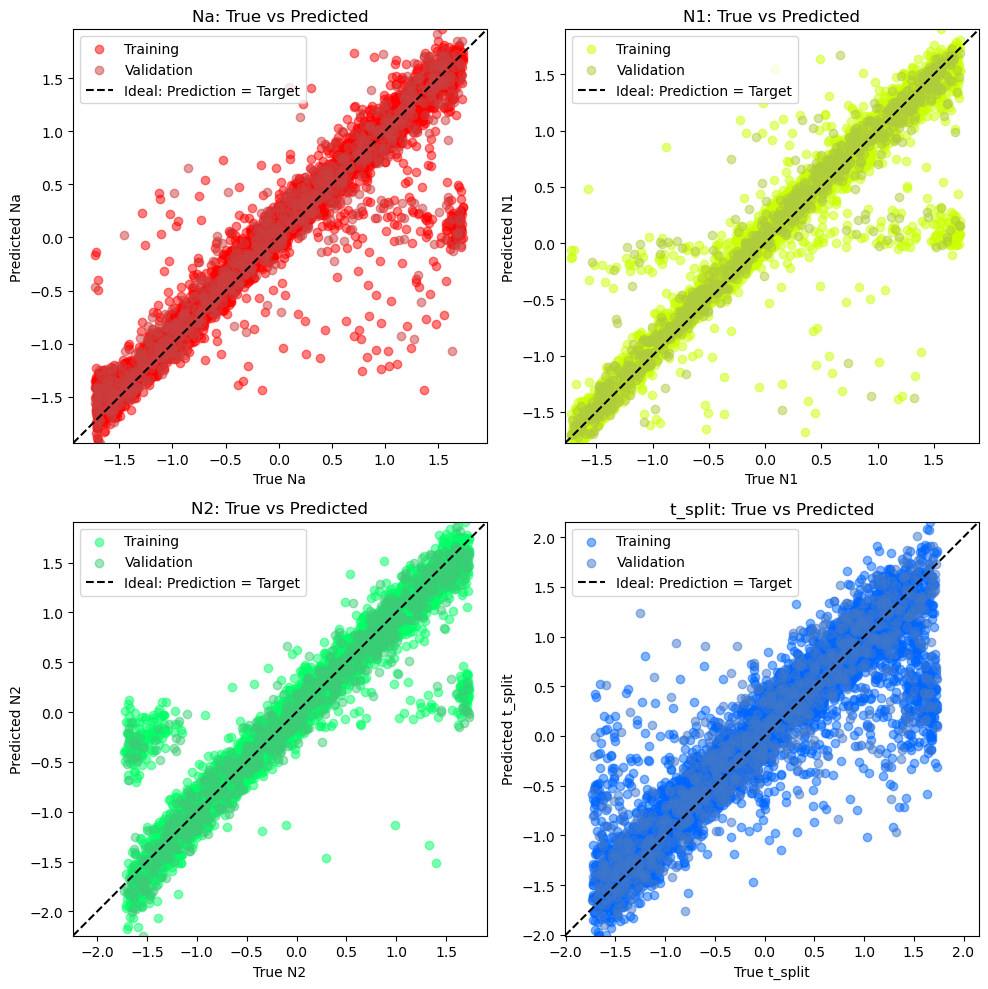

Linear model trained LFG


In [24]:
linear_evaluation(features_and_targets_filepath = features_file, model_directory = model_directory, model_config_path = model_config_file, color_shades_path = color_shades, main_colors_path = main_colors)

## Model 2: Dadi, Moments, MomentsLD, FIM

In [25]:
experiment_directory = 'model2_results'
experiment_config_path = '/sietch_colab/akapoor/Demographic_Inference/experiment_config.json'
model_directory = experiment_directory
model_config_file = '/sietch_colab/akapoor/Demographic_Inference/model_config.json'
features_file = f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl'
color_shades = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/color_shades.pkl'
main_colors = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/main_colors.pkl'

In [26]:
os.makedirs(experiment_directory, exist_ok=True)

In [27]:
# Drop columns with "_m", "FIM", or "ll" in their names
train_features_mdl2 = train_features[
    train_features.columns[~train_features.columns.str.contains(r'_m|ll', case=False, regex=True)]
]
validation_features_mdl2 = validation_features[
    validation_features.columns[~validation_features.columns.str.contains(r'_m|ll', case=False, regex=True)]
]


In [28]:
train_targets_mdl2 = train_targets[
    train_targets.columns[~train_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

validation_targets_mdl2 = validation_targets[
    validation_targets.columns[~validation_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

In [29]:
train_features_mdl2

,Moments_rep1_Na,Moments_rep1_N1,Moments_rep1_N2,Moments_rep1_t_split,Moments_rep1_FIM_element_0,Moments_rep1_FIM_element_1,Moments_rep1_FIM_element_2,Moments_rep1_FIM_element_3,Moments_rep1_FIM_element_4,Moments_rep1_FIM_element_5,...,Dadi_rep1_N2,Dadi_rep1_t_split,Dadi_rep2_Na,Dadi_rep2_N1,Dadi_rep2_N2,Dadi_rep2_t_split,MomentsLD_N1,MomentsLD_N2,MomentsLD_t_split,MomentsLD_Na
Sim_0,18312.940893,1962.993363,8799.887484,2017.692859,-3.096293e+07,-2.350519e+05,3.268639e+07,-280032.273433,-560630.704182,3.095970e+06,...,5226.096672,1349.084944,18527.519346,2305.214366,4579.664504,1048.861969,3772.592111,6149.382967,1952.713335,18340.982292
Sim_1,17199.757558,3675.237517,7626.385955,1614.606744,-5.833645e+06,-4.010803e+05,2.463077e+07,0.000000,138131.809041,2.001481e+06,...,2249.617907,1269.686473,15405.515981,4025.421201,3932.098932,3189.450839,9670.775190,3809.999622,3034.968035,18475.007366
Sim_2,14424.877778,2037.055635,7626.385955,1167.047345,-3.580451e+07,-7.269977e+05,9.400295e+07,-112331.240567,-10019.316692,4.124115e+06,...,7874.060437,1968.364800,15405.515981,2324.022921,8218.992792,1609.952074,9106.083961,7921.145834,3879.015464,19964.370869
Sim_3,14037.174409,1351.364942,8194.071424,948.369102,-2.200687e+07,-2.195852e+05,4.775351e+07,-104314.546589,-233682.476412,2.697979e+06,...,9285.348559,1260.589153,13340.607449,2788.616759,6631.887628,1222.623864,1896.365453,6803.138211,1126.946015,14195.576973
Sim_4,11751.536265,2175.665686,6119.424600,1586.366195,-7.145964e+06,-1.014322e+05,8.393800e+06,-108700.122201,-240417.614830,1.540169e+06,...,2900.213899,1570.031725,12811.783893,1482.091042,2911.869288,714.133761,7364.649220,3765.812916,1651.710342,15005.820367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sim_3995,14246.808111,2457.608225,7626.385955,1691.199547,-9.138877e+06,-6.551062e+04,1.341683e+07,-122959.387681,-158670.738080,1.235138e+06,...,3353.713922,971.259473,14533.375402,1665.397782,9300.392127,715.574421,5702.130219,9196.466011,1874.630489,13671.773958
Sim_3996,15678.876016,1016.565518,7626.385955,797.525852,-8.573738e+07,-5.022361e+04,1.099910e+08,-265760.977638,-12111.017579,5.121398e+05,...,9029.333236,649.409939,14424.424877,4487.696668,4648.809970,2048.282272,2966.689740,5473.524548,941.981215,17148.553463
Sim_3997,12897.416422,2788.273579,7626.385955,1354.518860,-4.981668e+06,-1.559490e+05,1.502321e+07,-88335.000761,29053.258662,7.686408e+05,...,4115.242375,1820.489921,17778.358790,3849.067681,2362.399052,2521.918619,9848.646604,4299.149542,2877.147793,12649.602219
Sim_3998,12448.976931,1454.054429,6088.051289,1708.205831,-1.720310e+07,-3.362811e+05,1.692437e+07,0.000000,-204442.015009,1.724429e+06,...,2523.947585,2336.547004,12625.489605,2559.803095,1688.087105,641.991929,5172.524489,4746.217267,3615.260545,11317.675001


In [30]:
import pickle
with open('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/features_and_targets.pkl', 'rb') as f:
    features_and_targets = pickle.load(f)

In [31]:
features_and_targets['training']['features'] = train_features_mdl2.to_numpy()
features_and_targets['validation']['features'] = validation_features_mdl2.to_numpy()

In [32]:
features_and_targets['training']['targets'] = train_targets_mdl2.to_numpy()
features_and_targets['validation']['targets'] = validation_targets_mdl2.to_numpy()

In [33]:
# Save the updated features and targets
with open(f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl', 'wb') as f:
    pickle.dump(features_and_targets, f)

In [34]:
from snakemake_scripts.linear_evaluation import linear_evaluation

PREDICTIONS SHAPE TRAINING: (4000, 4)
Maximum Value for y_true: 1.7317008983148228
Maximum Value for y_pred: 2.3363344421365433
Minimum Value for y_true: -1.7320508075688772
Minimum Value for y_pred: -2.460350957785062
[0.01481347 0.00842536 0.0498134  ... 0.0025249  0.00734131 0.31273189]
Maximum Value for y_true: 1.7313509890607686
Maximum Value for y_pred: 2.455434670759189
Minimum Value for y_true: -1.729929929028997
Minimum Value for y_pred: -2.4354972125152843
[1.03657093e-02 1.14778704e-02 3.95910386e-02 3.40434356e-02
 4.96067841e-01 1.06703779e-01 5.99591300e-02 1.50095280e-02
 5.54220611e-02 8.26789849e-03 4.02991463e-03 7.18777994e-02
 2.17883222e-02 8.16029052e-03 5.86414070e-02 2.16332480e-02
 1.97653049e-02 2.41751009e-02 2.88076400e-02 2.37985366e-02
 3.11043223e-03 7.47456121e-03 1.20375299e-02 2.53552398e-02
 4.45949480e-02 3.96934059e-01 4.51153741e-03 2.29430096e-02
 3.61439184e-02 1.87599594e-02 1.32044360e-01 8.17874610e-02
 7.28115540e-02 2.90323065e-02 1.36371090

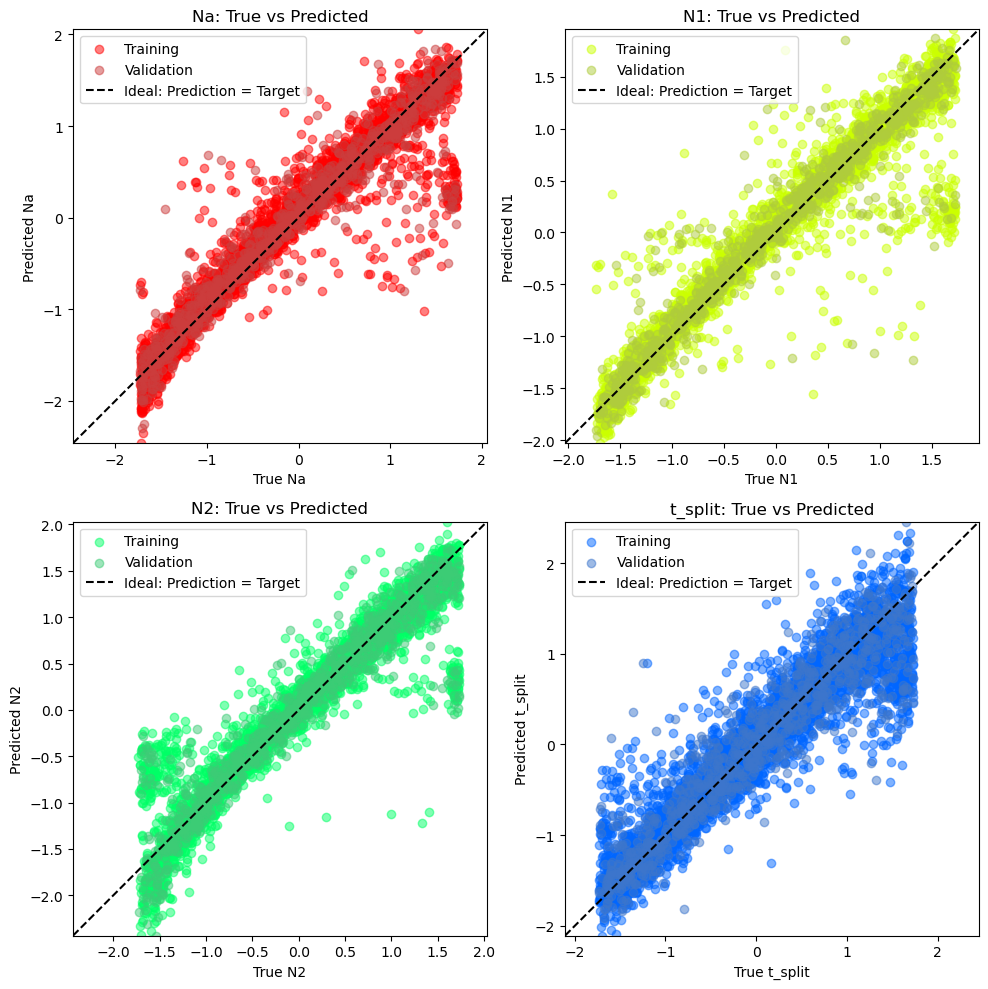

Linear model trained LFG


In [35]:
linear_evaluation(features_and_targets_filepath = features_file, model_directory = model_directory, model_config_path = model_config_file, color_shades_path = color_shades, main_colors_path = main_colors)

## Model 3

In [37]:
experiment_directory = 'model3_results'
experiment_config_path = '/sietch_colab/akapoor/Demographic_Inference/experiment_config.json'
model_directory = experiment_directory
model_config_file = '/sietch_colab/akapoor/Demographic_Inference/model_config.json'
features_file = f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl'
color_shades = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/color_shades.pkl'
main_colors = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/main_colors.pkl'

In [38]:
os.makedirs(experiment_directory, exist_ok=True)

In [39]:
train_features

,Moments_rep1_Na,Moments_rep1_N1,Moments_rep1_N2,Moments_rep1_t_split,Moments_rep1_m,Moments_rep1_ll,Moments_rep1_FIM_element_0,Moments_rep1_FIM_element_1,Moments_rep1_FIM_element_2,Moments_rep1_FIM_element_3,...,Dadi_rep2_N1,Dadi_rep2_N2,Dadi_rep2_t_split,Dadi_rep2_m,Dadi_rep2_ll,MomentsLD_N1,MomentsLD_N2,MomentsLD_t_split,MomentsLD_m,MomentsLD_Na
Sim_0,18312.940893,1962.993363,8799.887484,2017.692859,NaN,-47775.332252,-3.096293e+07,-2.350519e+05,3.268639e+07,-280032.273433,...,2305.214366,4579.664504,1048.861969,NaN,-15387.674793,3772.592111,6149.382967,1952.713335,5.410461e-07,18340.982292
Sim_1,17199.757558,3675.237517,7626.385955,1614.606744,NaN,-186936.798841,-5.833645e+06,-4.010803e+05,2.463077e+07,0.000000,...,4025.421201,3932.098932,3189.450839,NaN,-63789.098979,9670.775190,3809.999622,3034.968035,5.314941e-07,18475.007366
Sim_2,14424.877778,2037.055635,7626.385955,1167.047345,NaN,-132599.969905,-3.580451e+07,-7.269977e+05,9.400295e+07,-112331.240567,...,2324.022921,8218.992792,1609.952074,NaN,-91385.579362,9106.083961,7921.145834,3879.015464,4.773448e-07,19964.370869
Sim_3,14037.174409,1351.364942,8194.071424,948.369102,NaN,-12142.984030,-2.200687e+07,-2.195852e+05,4.775351e+07,-104314.546589,...,2788.616759,6631.887628,1222.623864,NaN,-12212.093743,1896.365453,6803.138211,1126.946015,7.476578e-07,14195.576973
Sim_4,11751.536265,2175.665686,6119.424600,1586.366195,NaN,-65579.572102,-7.145964e+06,-1.014322e+05,8.393800e+06,-108700.122201,...,1482.091042,2911.869288,714.133761,NaN,-53762.001157,7364.649220,3765.812916,1651.710342,1.014999e-06,15005.820367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sim_3995,14246.808111,2457.608225,7626.385955,1691.199547,NaN,-39290.044466,-9.138877e+06,-6.551062e+04,1.341683e+07,-122959.387681,...,1665.397782,9300.392127,715.574421,NaN,-36317.474290,5702.130219,9196.466011,1874.630489,7.137621e-07,13671.773958
Sim_3996,15678.876016,1016.565518,7626.385955,797.525852,NaN,-96296.410871,-8.573738e+07,-5.022361e+04,1.099910e+08,-265760.977638,...,4487.696668,4648.809970,2048.282272,NaN,-22499.650080,2966.689740,5473.524548,941.981215,6.004355e-07,17148.553463
Sim_3997,12897.416422,2788.273579,7626.385955,1354.518860,NaN,-139778.875604,-4.981668e+06,-1.559490e+05,1.502321e+07,-88335.000761,...,3849.067681,2362.399052,2521.918619,NaN,-58196.601943,9848.646604,4299.149542,2877.147793,7.379718e-07,12649.602219
Sim_3998,12448.976931,1454.054429,6088.051289,1708.205831,NaN,-68544.362925,-1.720310e+07,-3.362811e+05,1.692437e+07,0.000000,...,2559.803095,1688.087105,641.991929,NaN,-85135.911749,5172.524489,4746.217267,3615.260545,9.339483e-07,11317.675001


I want to get the row simulation numbers so I can append the SFS to each row. To do this, load the preprocessing object which has the indices saved.

In [40]:
import pickle
with open('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/preprocessing_results_obj.pkl', 'rb') as f:
    preprocessing_results = pickle.load(f)

In [41]:
train_indices = preprocessing_results['training']['indices']
validation_indices = preprocessing_results['validation']['indices']

In [42]:
# Drop columns with "_m", "FIM", or "ll" in their names
train_features_mdl3 = train_features[
    train_features.columns[~train_features.columns.str.contains(r'_m|ll', case=False, regex=True)]
]
validation_features_mdl3 = validation_features[
    validation_features.columns[~validation_features.columns.str.contains(r'_m|ll', case=False, regex=True)]
]


In [43]:
train_features_mdl3

,Moments_rep1_Na,Moments_rep1_N1,Moments_rep1_N2,Moments_rep1_t_split,Moments_rep1_FIM_element_0,Moments_rep1_FIM_element_1,Moments_rep1_FIM_element_2,Moments_rep1_FIM_element_3,Moments_rep1_FIM_element_4,Moments_rep1_FIM_element_5,...,Dadi_rep1_N2,Dadi_rep1_t_split,Dadi_rep2_Na,Dadi_rep2_N1,Dadi_rep2_N2,Dadi_rep2_t_split,MomentsLD_N1,MomentsLD_N2,MomentsLD_t_split,MomentsLD_Na
Sim_0,18312.940893,1962.993363,8799.887484,2017.692859,-3.096293e+07,-2.350519e+05,3.268639e+07,-280032.273433,-560630.704182,3.095970e+06,...,5226.096672,1349.084944,18527.519346,2305.214366,4579.664504,1048.861969,3772.592111,6149.382967,1952.713335,18340.982292
Sim_1,17199.757558,3675.237517,7626.385955,1614.606744,-5.833645e+06,-4.010803e+05,2.463077e+07,0.000000,138131.809041,2.001481e+06,...,2249.617907,1269.686473,15405.515981,4025.421201,3932.098932,3189.450839,9670.775190,3809.999622,3034.968035,18475.007366
Sim_2,14424.877778,2037.055635,7626.385955,1167.047345,-3.580451e+07,-7.269977e+05,9.400295e+07,-112331.240567,-10019.316692,4.124115e+06,...,7874.060437,1968.364800,15405.515981,2324.022921,8218.992792,1609.952074,9106.083961,7921.145834,3879.015464,19964.370869
Sim_3,14037.174409,1351.364942,8194.071424,948.369102,-2.200687e+07,-2.195852e+05,4.775351e+07,-104314.546589,-233682.476412,2.697979e+06,...,9285.348559,1260.589153,13340.607449,2788.616759,6631.887628,1222.623864,1896.365453,6803.138211,1126.946015,14195.576973
Sim_4,11751.536265,2175.665686,6119.424600,1586.366195,-7.145964e+06,-1.014322e+05,8.393800e+06,-108700.122201,-240417.614830,1.540169e+06,...,2900.213899,1570.031725,12811.783893,1482.091042,2911.869288,714.133761,7364.649220,3765.812916,1651.710342,15005.820367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sim_3995,14246.808111,2457.608225,7626.385955,1691.199547,-9.138877e+06,-6.551062e+04,1.341683e+07,-122959.387681,-158670.738080,1.235138e+06,...,3353.713922,971.259473,14533.375402,1665.397782,9300.392127,715.574421,5702.130219,9196.466011,1874.630489,13671.773958
Sim_3996,15678.876016,1016.565518,7626.385955,797.525852,-8.573738e+07,-5.022361e+04,1.099910e+08,-265760.977638,-12111.017579,5.121398e+05,...,9029.333236,649.409939,14424.424877,4487.696668,4648.809970,2048.282272,2966.689740,5473.524548,941.981215,17148.553463
Sim_3997,12897.416422,2788.273579,7626.385955,1354.518860,-4.981668e+06,-1.559490e+05,1.502321e+07,-88335.000761,29053.258662,7.686408e+05,...,4115.242375,1820.489921,17778.358790,3849.067681,2362.399052,2521.918619,9848.646604,4299.149542,2877.147793,12649.602219
Sim_3998,12448.976931,1454.054429,6088.051289,1708.205831,-1.720310e+07,-3.362811e+05,1.692437e+07,0.000000,-204442.015009,1.724429e+06,...,2523.947585,2336.547004,12625.489605,2559.803095,1688.087105,641.991929,5172.524489,4746.217267,3615.260545,11317.675001


In [44]:
# Initialize a list to store flattened SFS data
flattened_SFS_data = []

# Process each index in train_indices
for idx in tqdm(train_indices, desc="Processing SFS data"):
    file_path = os.path.join('/sietch_colab/akapoor/Demographic_Inference/moments_dadi_features', f"software_inferences_sim_{idx}.pkl")
    
    # Load the data from the file
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    
    # Find the index of the maximum log-likelihood in 'll_all_replicates_dadi'
    max_ll_index = np.argmax(data['ll_all_replicates_dadi'])
    
    # Extract the corresponding SFS
    selected_SFS = data['model_sfs_dadi'][max_ll_index]
    
    # Flatten the SFS and append to the list
    flattened_SFS = np.array(selected_SFS.flatten())
    flattened_SFS_data.append(flattened_SFS)

# Convert the flattened SFS data to a DataFrame
sfs_features_df = pd.DataFrame(flattened_SFS_data)

# Rename columns to SFS_feature_0, SFS_feature_1, ..., SFS_feature_N
sfs_features_df.columns = [f"SFS_feature_{i}" for i in range(sfs_features_df.shape[1])]

# Append the new SFS columns to `train_features_mdl3` as new columns
# No merging by indices, just appending directly
train_features_mdl3 = pd.concat([train_features_mdl3.reset_index(drop=True), sfs_features_df.reset_index(drop=True)], axis=1)


Processing SFS data: 100%|██████████| 4000/4000 [00:11<00:00, 360.68it/s] 


In [45]:
# Initialize a list to store flattened SFS data
flattened_SFS_data = []

# Process each index in train_indices
for idx in tqdm(validation_indices, desc="Processing SFS data"):
    file_path = os.path.join('/sietch_colab/akapoor/Demographic_Inference/moments_dadi_features', f"software_inferences_sim_{idx}.pkl")
    
    # Load the data from the file
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    
    # Find the index of the maximum log-likelihood in 'll_all_replicates_dadi'
    max_ll_index = np.argmax(data['ll_all_replicates_dadi'])
    
    # Extract the corresponding SFS
    selected_SFS = data['model_sfs_dadi'][max_ll_index]
    
    # Flatten the SFS and append to the list
    flattened_SFS = np.array(selected_SFS.flatten())
    flattened_SFS_data.append(flattened_SFS)

# Convert the flattened SFS data to a DataFrame
sfs_features_df = pd.DataFrame(flattened_SFS_data)

# Rename columns to SFS_feature_0, SFS_feature_1, ..., SFS_feature_N
sfs_features_df.columns = [f"SFS_feature_{i}" for i in range(sfs_features_df.shape[1])]

# Append the new SFS columns to `train_features_mdl3` as new columns
# No merging by indices, just appending directly
validation_features_mdl3 = pd.concat([validation_features_mdl3.reset_index(drop=True), sfs_features_df.reset_index(drop=True)], axis=1)


Processing SFS data: 100%|██████████| 1000/1000 [00:00<00:00, 3975.93it/s]


In [46]:
train_features_mdl3

,Moments_rep1_Na,Moments_rep1_N1,Moments_rep1_N2,Moments_rep1_t_split,Moments_rep1_FIM_element_0,Moments_rep1_FIM_element_1,Moments_rep1_FIM_element_2,Moments_rep1_FIM_element_3,Moments_rep1_FIM_element_4,Moments_rep1_FIM_element_5,...,SFS_feature_1671,SFS_feature_1672,SFS_feature_1673,SFS_feature_1674,SFS_feature_1675,SFS_feature_1676,SFS_feature_1677,SFS_feature_1678,SFS_feature_1679,SFS_feature_1680
0,18312.940893,1962.993363,8799.887484,2017.692859,-3.096293e+07,-2.350519e+05,3.268639e+07,-280032.273433,-560630.704182,3.095970e+06,...,546.046670,590.921543,638.696386,689.505586,743.485772,800.775794,861.517342,925.858088,994.057038,181189.626827
1,17199.757558,3675.237517,7626.385955,1614.606744,-5.833645e+06,-4.010803e+05,2.463077e+07,0.000000,138131.809041,2.001481e+06,...,1151.587690,1186.184424,1221.336206,1257.043548,1293.308101,1330.134223,1367.532656,1405.530913,1444.317736,247482.144772
2,14424.877778,2037.055635,7626.385955,1167.047345,-3.580451e+07,-7.269977e+05,9.400295e+07,-112331.240567,-10019.316692,4.124115e+06,...,382.080840,440.956672,507.879976,583.797396,669.741464,766.834273,876.291500,999.429828,1138.103075,290262.325286
3,14037.174409,1351.364942,8194.071424,948.369102,-2.200687e+07,-2.195852e+05,4.775351e+07,-104314.546589,-233682.476412,2.697979e+06,...,308.441833,317.731180,327.167053,336.749064,346.477132,356.351918,366.375949,376.561818,389.565614,342546.439032
4,11751.536265,2175.665686,6119.424600,1586.366195,-7.145964e+06,-1.014322e+05,8.393800e+06,-108700.122201,-240417.614830,1.540169e+06,...,3.167316,6.297049,12.452450,24.515922,48.096398,94.109872,183.820834,358.721867,699.956079,299982.096098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,14246.808111,2457.608225,7626.385955,1691.199547,-9.138877e+06,-6.551062e+04,1.341683e+07,-122959.387681,-158670.738080,1.235138e+06,...,655.858397,688.933412,723.117009,758.423936,794.868257,832.463619,871.223983,911.167499,953.246232,315171.218472
3996,15678.876016,1016.565518,7626.385955,797.525852,-8.573738e+07,-5.022361e+04,1.099910e+08,-265760.977638,-12111.017579,5.121398e+05,...,375.827023,394.266849,413.303360,432.944336,453.197637,474.071787,495.577481,517.734638,541.876584,263533.559870
3997,12897.416422,2788.273579,7626.385955,1354.518860,-4.981668e+06,-1.559490e+05,1.502321e+07,-88335.000761,29053.258662,7.686408e+05,...,1768.713295,1785.098055,1801.512864,1817.956686,1834.428757,1850.928985,1867.458986,1884.025142,1900.647804,244932.483603
3998,12448.976931,1454.054429,6088.051289,1708.205831,-1.720310e+07,-3.362811e+05,1.692437e+07,0.000000,-204442.015009,1.724429e+06,...,289.054607,314.168426,341.004255,369.645036,400.175156,432.680775,467.251124,503.984548,543.729630,202626.702469


In [47]:
validation_features_mdl3

,Moments_rep1_Na,Moments_rep1_N1,Moments_rep1_N2,Moments_rep1_t_split,Moments_rep1_FIM_element_0,Moments_rep1_FIM_element_1,Moments_rep1_FIM_element_2,Moments_rep1_FIM_element_3,Moments_rep1_FIM_element_4,Moments_rep1_FIM_element_5,...,SFS_feature_1671,SFS_feature_1672,SFS_feature_1673,SFS_feature_1674,SFS_feature_1675,SFS_feature_1676,SFS_feature_1677,SFS_feature_1678,SFS_feature_1679,SFS_feature_1680
0,11617.387653,1095.839276,7574.890961,2234.553323,-3.250012e+07,-112236.906407,2.220065e+07,-676470.891509,-49232.204483,3.896089e+05,...,1243.119807,1295.122285,1348.481377,1403.208501,1459.314551,1516.810474,1575.708732,1636.027876,1697.956810,299314.089364
1,13383.166844,2004.082897,5580.812577,2112.284689,-1.572000e+07,-384044.923272,1.242238e+07,-53843.180249,238332.380175,1.726346e+06,...,793.841030,820.037104,846.705787,873.845924,901.456400,929.536567,958.087258,987.115760,1017.786382,361133.429856
2,15270.972017,1750.721912,9850.104725,2183.003300,5.810493e+06,-865861.002386,3.622781e+07,-377009.262179,-192508.649894,2.181685e+06,...,270.026099,273.930586,277.854453,281.797801,285.761159,289.745880,293.755138,297.799395,303.226172,217654.931136
3,17266.590378,2241.006285,7574.890961,1173.440523,-1.918477e+07,-105146.367490,4.086205e+07,-119110.093717,-43329.566271,1.254156e+06,...,288.135211,306.339383,325.373414,345.258741,366.016883,387.670020,410.242563,433.768153,459.342881,216026.945073
4,16071.431921,2059.677658,7574.890961,1058.990557,-1.207787e+07,-359271.681227,4.378329e+07,-87242.651663,-97099.324627,2.773045e+06,...,568.568694,615.391374,665.238787,718.249781,774.565933,834.332437,897.701123,964.841426,1036.170563,212706.357770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14191.536890,1264.291996,9980.792396,1210.006864,-3.297392e+07,-384615.638516,4.913572e+07,-236506.902303,-5648.721997,1.343452e+06,...,452.471153,524.166370,606.092179,699.548698,805.974759,926.957732,1064.243325,1219.745226,1395.560601,224304.511906
996,15269.903031,1739.398634,8242.688453,983.442780,-1.787203e+07,-424094.567969,4.335260e+07,-95540.426267,-73512.764313,3.040539e+06,...,668.899956,707.911808,748.534935,790.806137,834.761648,880.437426,927.870094,977.100252,1028.331050,199293.423828
997,11644.906631,2252.025776,7574.890961,1034.904501,8.740425e+06,-387422.783365,4.042382e+07,0.000000,49589.265993,1.020848e+06,...,328.371323,368.455584,412.700066,461.452490,515.079443,573.966617,638.520062,709.172665,787.006685,242077.360025
998,16703.799488,3619.282205,6987.330494,1816.723745,-5.356111e+06,-156699.199198,1.207343e+07,-256217.881203,-872874.775713,4.227178e+06,...,334.247555,402.486002,483.672329,580.069965,694.292248,829.344676,988.669711,1176.193750,1396.418719,261177.717579


In [48]:
train_targets_mdl3 = train_targets[
    train_targets.columns[~train_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

validation_targets_mdl3 = validation_targets[
    validation_targets.columns[~validation_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

In [49]:
import pickle
with open('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/features_and_targets.pkl', 'rb') as f:
    features_and_targets = pickle.load(f)

In [50]:
features_and_targets['training']['features'] = train_features_mdl3.to_numpy()
features_and_targets['validation']['features'] = validation_features_mdl3.to_numpy()

In [51]:
features_and_targets['training']['targets'] = train_targets_mdl3.to_numpy()
features_and_targets['validation']['targets'] = validation_targets_mdl3.to_numpy()

In [52]:
# Save the updated features and targets
with open(f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl', 'wb') as f:
    pickle.dump(features_and_targets, f)

In [53]:
from snakemake_scripts.linear_evaluation import linear_evaluation

PREDICTIONS SHAPE TRAINING: (4000, 4)
Maximum Value for y_true: 1.7317008983148228
Maximum Value for y_pred: 2.279853860666754
Minimum Value for y_true: -1.7320508075688772
Minimum Value for y_pred: -2.4836506593307277
[0.01854574 0.03877006 0.06287561 ... 0.01221467 0.0081892  0.32330524]
Maximum Value for y_true: 1.7313509890607686
Maximum Value for y_pred: 2.4922618565860613
Minimum Value for y_true: -1.729929929028997
Minimum Value for y_pred: -2.53348782769799
[7.32261637e-03 1.74233436e-02 4.14866480e-02 5.83018867e-02
 5.91956590e-01 1.09350132e-01 7.29787892e-02 2.22317750e-02
 7.53375329e-02 4.63687630e-02 6.66091797e-03 9.12842790e-02
 5.44855130e-02 9.35867645e-03 5.84141984e-02 2.16864031e-02
 1.94782594e-02 1.90856026e-02 1.99638141e-02 1.74634625e-02
 9.37142062e-03 4.46857126e-03 1.05322993e-01 2.68083100e-02
 5.69367211e-02 3.96534521e-01 4.51251074e-03 1.51417854e-01
 8.04992074e-02 1.94251073e-02 1.55385923e-01 1.10116852e-01
 7.78825279e-02 3.70318879e-02 1.53122663e

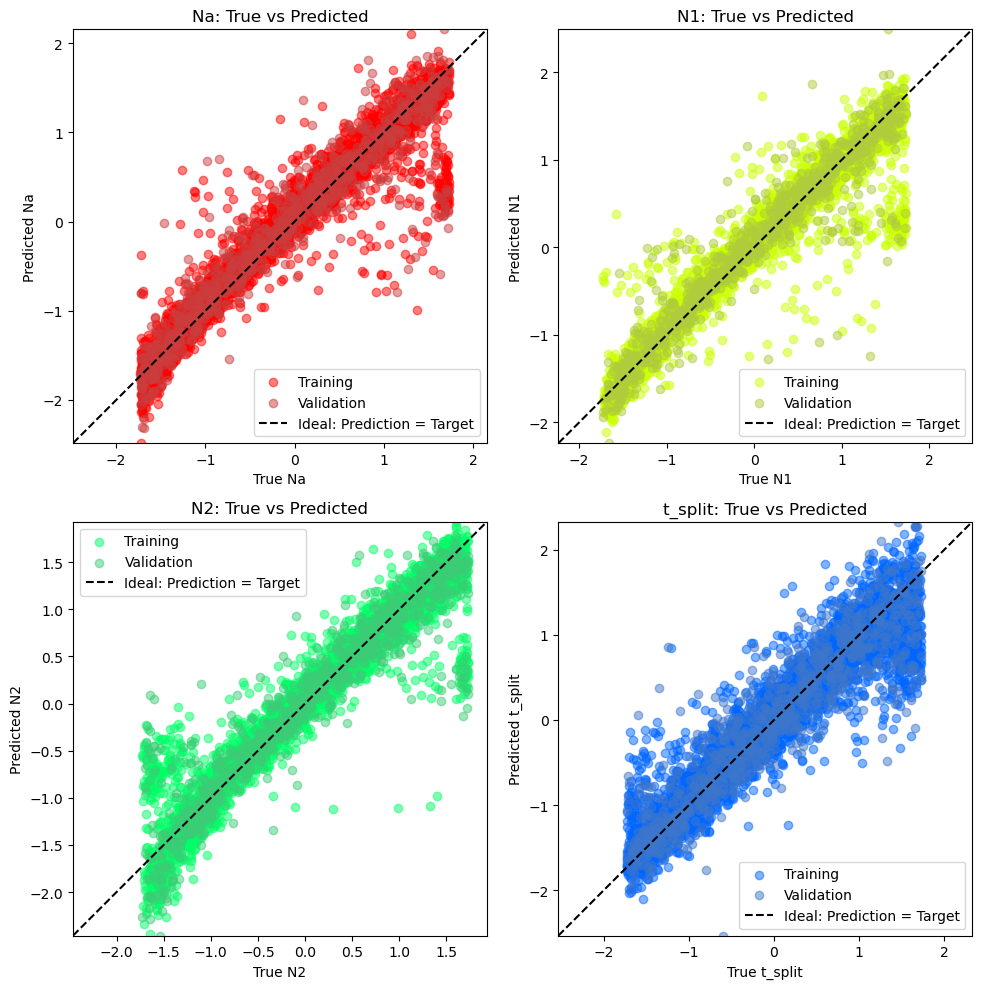

Linear model trained LFG


In [54]:
linear_evaluation(features_and_targets_filepath = features_file, model_directory = model_directory, model_config_path = model_config_file, color_shades_path = color_shades, main_colors_path = main_colors)

Let's open the Linear model object and get the predictions

In [55]:
with open('/sietch_colab/akapoor/Demographic_Inference/model3_results/linear_mdl_obj.pkl', 'rb') as f:
    linear_mdl_obj = pickle.load(f)

In [56]:
linear_mdl_obj['param_names']

['Na', 'N1', 'N2', 't_split']

In [57]:
linear_mdl_obj['training']

{'predictions': array([[-0.39545048, -0.36346727,  0.35817205,  0.87187597],
        [ 0.03791639,  1.51591568, -0.41859791,  1.3284278 ],
        [ 0.88751792,  1.20201236,  1.01036695,  1.04915418],
        ...,
        [ 0.30899344,  1.8227951 , -0.34251377, -1.07537794],
        [ 0.57881348,  0.05103735, -0.0711335 , -1.46097411],
        [ 0.67403221, -0.76446109, -1.14069737,  0.2668917 ]]),
 'targets': array([[-0.43619402, -0.48672377,  0.37160363,  1.11093739],
        [ 0.34641016,  1.69426061, -0.39679709,  1.16220609],
        [ 0.91621953,  1.32930526,  0.96749909,  1.53147932],
        ...,
        [ 0.27783509,  1.71630489, -0.25823303, -0.90378411],
        [ 0.73735877, -0.02309401, -0.09342577, -1.42062807],
        [ 0.46376544, -0.87652268, -1.23832885,  1.37455552]])}

In [58]:
def calculate_mse_df(dataset_type, linear_mdl_obj):
    """Calculate MSE and standard errors for a given dataset type (training or validation)"""
    params = linear_mdl_obj['param_names']
    mse_values = {}
    mse_errors = {}

    for i, param in enumerate(params):
        mse_values[param] = {}
        mse_errors[param] = {}
        target_values = linear_mdl_obj[dataset_type]['targets'][i]
        predictions = linear_mdl_obj[dataset_type]['predictions'][i]
        
        # Calculate MSE for each simulation
        squared_errors = (predictions - target_values) ** 2

        # Mean MSE across all simulations
        mse_values[param]['model3'] = np.mean(squared_errors)

        # Standard error of MSE across simulations
        mse_errors[param]['model3'] = np.std(squared_errors) / np.sqrt(len(squared_errors))

    # Create DataFrame
    result_df = pd.DataFrame({
        'Model3': [mse_values[p]['model3'] for p in params],
        'Model3_std_err': [mse_errors[p]['model3'] for p in params],
    }, index=params)
    
    return result_df

# Calculate MSE for both datasets
train_df = calculate_mse_df('training', linear_mdl_obj)
val_df = calculate_mse_df('validation', linear_mdl_obj)

print("Training MSE Values and Standard Errors:")
print(train_df)
print("\nValidation MSE Values and Standard Errors:")
print(val_df)


Training MSE Values and Standard Errors:
           Model3  Model3_std_err
Na       0.018546        0.011522
N1       0.038770        0.017356
N2       0.062876        0.049100
t_split  0.046643        0.021698

Validation MSE Values and Standard Errors:
           Model3  Model3_std_err
Na       0.007323        0.001850
N1       0.017423        0.006986
N2       0.041487        0.028243
t_split  0.058302        0.028660


Load in the the raw features MSE values for comparison (calculated in the probing_inference.ipynb)

In [59]:
import pandas as pd
momentsld_train = pd.read_csv('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/mean_values_preprocess_train.csv', index_col = 0)
momentsld_validation = pd.read_csv('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/mean_values_preprocess_validation.csv', index_col = 0)

In [60]:
# Using str.contains()
momentsLD_train = momentsld_train.loc[:, momentsld_train.columns.str.contains('MomentsLD')]
momentsLD_validation = momentsld_validation.loc[:, momentsld_validation.columns.str.contains('MomentsLD')]


In [61]:
# Merge dataframes horizontally
result_df1_train = pd.concat([momentsLD_train, train_df], axis=1)
result_df1_validation = pd.concat([momentsLD_validation, val_df], axis=1)

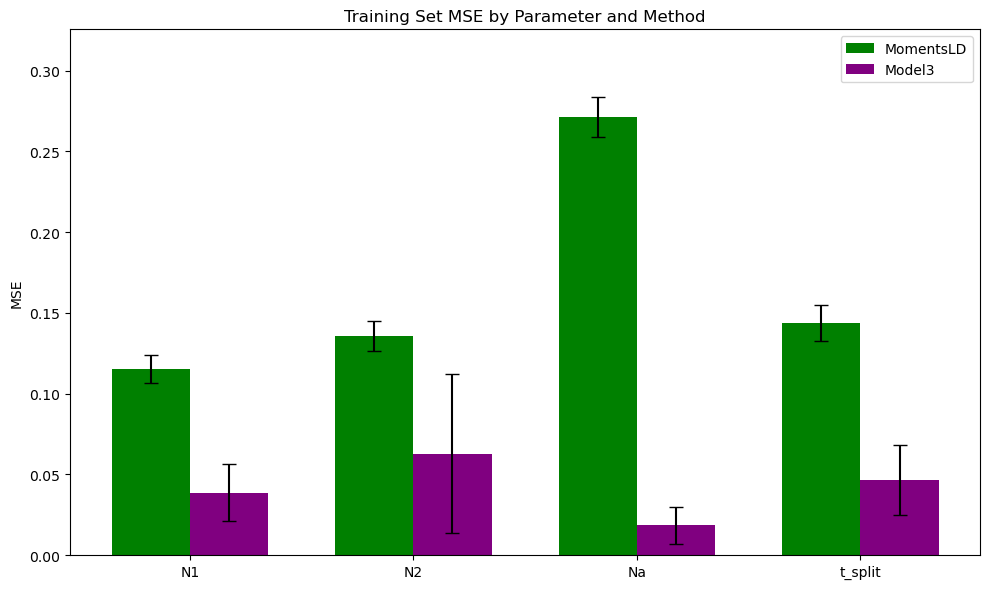

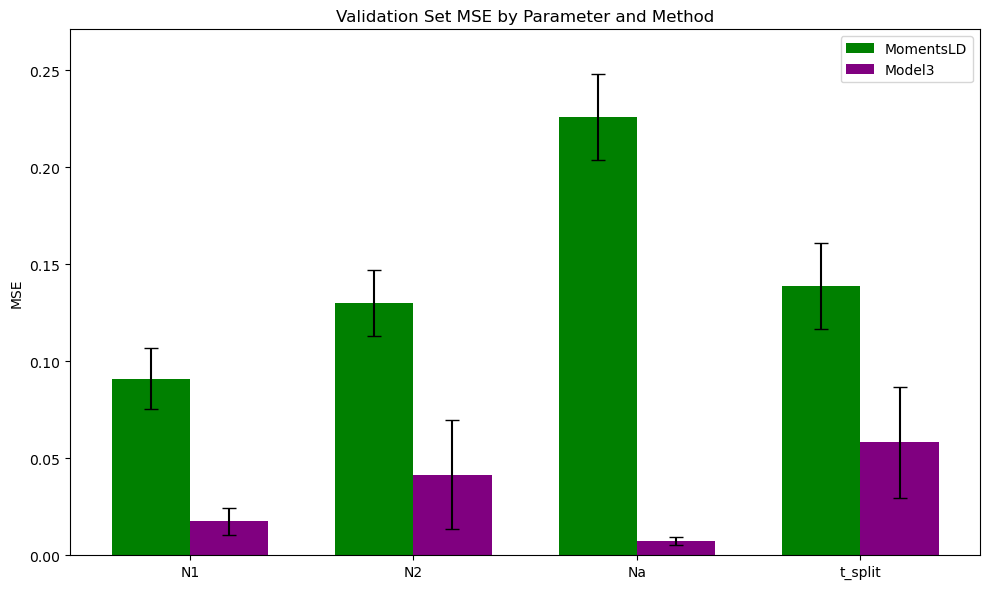

In [62]:
import matplotlib.pyplot as plt
def plot_comparison_barplot(result_df, title='MSE by Parameter and Method'):
   """
   Create grouped bar plot comparing MomentsLD and Model3 MSE values
   
   Parameters:
   -----------
   result_df : pandas DataFrame
       DataFrame containing MomentsLD, MomentsLD_std_err, Model3, and Model3_std_err columns
   title : str
       Title for the plot
   
   Returns:
   --------
   fig : matplotlib figure object
   """
   # Get parameter names (indices of DataFrame)
   params = result_df.index
   
   # Create grouped bar plot
   x = np.arange(len(params))
   width = 0.35  # Made slightly wider for better visibility

   fig, ax = plt.subplots(figsize=(10, 6))

   # Create bars with error bars
   rects1 = ax.bar(x - width/2, result_df['MomentsLD'], width,
                   yerr=result_df['MomentsLD_std_err'],
                   label='MomentsLD', capsize=5, color='green')
   rects2 = ax.bar(x + width/2, result_df['Model3'], width,
                   yerr=result_df['Model3_std_err'],
                   label='Model3', capsize=5, color='purple')

   ax.set_ylabel('MSE')
   ax.set_title(title)
   ax.set_xticks(x)
   ax.set_xticklabels(params)
   ax.legend()

   # Add some padding to the top of the plot to show error bars fully
   ax.set_ylim(0, max(result_df['MomentsLD'].max(), result_df['Model3'].max()) * 1.2)

   plt.tight_layout()
   
   return fig

# Usage example:
fig = plot_comparison_barplot(result_df1_train, "Training Set MSE by Parameter and Method")
plt.show()

fig = plot_comparison_barplot(result_df1_validation, "Validation Set MSE by Parameter and Method")
plt.show()

## Model 4

In [85]:
experiment_directory = 'model4_results'
experiment_config_path = '/sietch_colab/akapoor/Demographic_Inference/experiment_config.json'
model_directory = experiment_directory
model_config_file = '/sietch_colab/akapoor/Demographic_Inference/model_config.json'
features_file = f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl'
color_shades = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/color_shades.pkl'
main_colors = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/main_colors.pkl'

In [86]:
os.makedirs(experiment_directory, exist_ok=True)

In [87]:
train_features

,Moments_rep1_Na,Moments_rep1_N1,Moments_rep1_N2,Moments_rep1_t_split,Moments_rep1_m,Moments_rep1_ll,Moments_rep1_FIM_element_0,Moments_rep1_FIM_element_1,Moments_rep1_FIM_element_2,Moments_rep1_FIM_element_3,...,Dadi_rep2_N1,Dadi_rep2_N2,Dadi_rep2_t_split,Dadi_rep2_m,Dadi_rep2_ll,MomentsLD_N1,MomentsLD_N2,MomentsLD_t_split,MomentsLD_m,MomentsLD_Na
Sim_0,18312.940893,1962.993363,8799.887484,2017.692859,NaN,-47775.332252,-3.096293e+07,-2.350519e+05,3.268639e+07,-280032.273433,...,2305.214366,4579.664504,1048.861969,NaN,-15387.674793,3772.592111,6149.382967,1952.713335,5.410461e-07,18340.982292
Sim_1,17199.757558,3675.237517,7626.385955,1614.606744,NaN,-186936.798841,-5.833645e+06,-4.010803e+05,2.463077e+07,0.000000,...,4025.421201,3932.098932,3189.450839,NaN,-63789.098979,9670.775190,3809.999622,3034.968035,5.314941e-07,18475.007366
Sim_2,14424.877778,2037.055635,7626.385955,1167.047345,NaN,-132599.969905,-3.580451e+07,-7.269977e+05,9.400295e+07,-112331.240567,...,2324.022921,8218.992792,1609.952074,NaN,-91385.579362,9106.083961,7921.145834,3879.015464,4.773448e-07,19964.370869
Sim_3,14037.174409,1351.364942,8194.071424,948.369102,NaN,-12142.984030,-2.200687e+07,-2.195852e+05,4.775351e+07,-104314.546589,...,2788.616759,6631.887628,1222.623864,NaN,-12212.093743,1896.365453,6803.138211,1126.946015,7.476578e-07,14195.576973
Sim_4,11751.536265,2175.665686,6119.424600,1586.366195,NaN,-65579.572102,-7.145964e+06,-1.014322e+05,8.393800e+06,-108700.122201,...,1482.091042,2911.869288,714.133761,NaN,-53762.001157,7364.649220,3765.812916,1651.710342,1.014999e-06,15005.820367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sim_3995,14246.808111,2457.608225,7626.385955,1691.199547,NaN,-39290.044466,-9.138877e+06,-6.551062e+04,1.341683e+07,-122959.387681,...,1665.397782,9300.392127,715.574421,NaN,-36317.474290,5702.130219,9196.466011,1874.630489,7.137621e-07,13671.773958
Sim_3996,15678.876016,1016.565518,7626.385955,797.525852,NaN,-96296.410871,-8.573738e+07,-5.022361e+04,1.099910e+08,-265760.977638,...,4487.696668,4648.809970,2048.282272,NaN,-22499.650080,2966.689740,5473.524548,941.981215,6.004355e-07,17148.553463
Sim_3997,12897.416422,2788.273579,7626.385955,1354.518860,NaN,-139778.875604,-4.981668e+06,-1.559490e+05,1.502321e+07,-88335.000761,...,3849.067681,2362.399052,2521.918619,NaN,-58196.601943,9848.646604,4299.149542,2877.147793,7.379718e-07,12649.602219
Sim_3998,12448.976931,1454.054429,6088.051289,1708.205831,NaN,-68544.362925,-1.720310e+07,-3.362811e+05,1.692437e+07,0.000000,...,2559.803095,1688.087105,641.991929,NaN,-85135.911749,5172.524489,4746.217267,3615.260545,9.339483e-07,11317.675001


I want to get the row simulation numbers so I can append the SFS to each row. To do this, load the preprocessing object which has the indices saved.

In [88]:
import pickle
with open('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/preprocessing_results_obj.pkl', 'rb') as f:
    preprocessing_results = pickle.load(f)

In [89]:
train_indices = preprocessing_results['training']['indices']
validation_indices = preprocessing_results['validation']['indices']

In [90]:
# Drop columns with "_m", "FIM", or "ll" in their names
train_features_mdl4 = train_features[
    train_features.columns[~train_features.columns.str.contains(r'_m|FIM|ll', case=False, regex=True)]
]
validation_features_mdl4 = validation_features[
    validation_features.columns[~validation_features.columns.str.contains(r'_m|FIM|ll', case=False, regex=True)]
]


In [91]:
train_features_mdl4

,Moments_rep1_Na,Moments_rep1_N1,Moments_rep1_N2,Moments_rep1_t_split,Moments_rep2_Na,Moments_rep2_N1,Moments_rep2_N2,Moments_rep2_t_split,Dadi_rep1_Na,Dadi_rep1_N1,Dadi_rep1_N2,Dadi_rep1_t_split,Dadi_rep2_Na,Dadi_rep2_N1,Dadi_rep2_N2,Dadi_rep2_t_split,MomentsLD_N1,MomentsLD_N2,MomentsLD_t_split,MomentsLD_Na
Sim_0,18312.940893,1962.993363,8799.887484,2017.692859,15914.499775,1463.202844,7811.491921,1269.991926,18022.110490,3071.363055,5226.096672,1349.084944,18527.519346,2305.214366,4579.664504,1048.861969,3772.592111,6149.382967,1952.713335,18340.982292
Sim_1,17199.757558,3675.237517,7626.385955,1614.606744,18971.102215,1932.964963,9893.088925,1522.724471,15381.505846,2865.370168,2249.617907,1269.686473,15405.515981,4025.421201,3932.098932,3189.450839,9670.775190,3809.999622,3034.968035,18475.007366
Sim_2,14424.877778,2037.055635,7626.385955,1167.047345,14308.946453,1585.637800,7811.491921,2359.169322,15381.505846,3856.348017,7874.060437,1968.364800,15405.515981,2324.022921,8218.992792,1609.952074,9106.083961,7921.145834,3879.015464,19964.370869
Sim_3,14037.174409,1351.364942,8194.071424,948.369102,12900.812764,1341.681208,7811.491921,1614.834083,12842.751646,2382.868553,9285.348559,1260.589153,13340.607449,2788.616759,6631.887628,1222.623864,1896.365453,6803.138211,1126.946015,14195.576973
Sim_4,11751.536265,2175.665686,6119.424600,1586.366195,10627.963132,1757.097052,7811.491921,868.999887,13285.450777,2528.819676,2900.213899,1570.031725,12811.783893,1482.091042,2911.869288,714.133761,7364.649220,3765.812916,1651.710342,15005.820367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sim_3995,14246.808111,2457.608225,7626.385955,1691.199547,13358.017244,2691.643172,7811.491921,861.598325,16410.621192,2567.596204,3353.713922,971.259473,14533.375402,1665.397782,9300.392127,715.574421,5702.130219,9196.466011,1874.630489,13671.773958
Sim_3996,15678.876016,1016.565518,7626.385955,797.525852,16197.261810,1068.079087,7811.491921,1063.777209,15765.335999,1918.485019,9029.333236,649.409939,14424.424877,4487.696668,4648.809970,2048.282272,2966.689740,5473.524548,941.981215,17148.553463
Sim_3997,12897.416422,2788.273579,7626.385955,1354.518860,12745.683084,1953.042542,7811.491921,1829.063835,15494.051442,3280.193463,4115.242375,1820.489921,17778.358790,3849.067681,2362.399052,2521.918619,9848.646604,4299.149542,2877.147793,12649.602219
Sim_3998,12448.976931,1454.054429,6088.051289,1708.205831,11226.371260,1021.344278,7811.491921,971.585428,15480.859588,2098.904044,2523.947585,2336.547004,12625.489605,2559.803095,1688.087105,641.991929,5172.524489,4746.217267,3615.260545,11317.675001


In [92]:
# Initialize a list to store flattened SFS data
flattened_SFS_data = []

# Process each index in train_indices
for idx in tqdm(train_indices, desc="Processing SFS data"):
    file_path = os.path.join('/sietch_colab/akapoor/Demographic_Inference/moments_dadi_features', f"software_inferences_sim_{idx}.pkl")
    
    # Load the data from the file
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    
    # Find the index of the maximum log-likelihood in 'll_all_replicates_dadi'
    max_ll_index = np.argmax(data['ll_all_replicates_dadi'])
    
    # Extract the corresponding SFS
    selected_SFS = data['model_sfs_dadi'][max_ll_index]
    
    # Flatten the SFS and append to the list
    flattened_SFS = np.array(selected_SFS.flatten())
    flattened_SFS_data.append(flattened_SFS)

# Convert the flattened SFS data to a DataFrame
sfs_features_df = pd.DataFrame(flattened_SFS_data)

# Rename columns to SFS_feature_0, SFS_feature_1, ..., SFS_feature_N
sfs_features_df.columns = [f"SFS_feature_{i}" for i in range(sfs_features_df.shape[1])]

# Append the new SFS columns to `train_features_mdl3` as new columns
# No merging by indices, just appending directly
train_features_mdl4 = pd.concat([train_features_mdl4.reset_index(drop=True), sfs_features_df.reset_index(drop=True)], axis=1)


Processing SFS data: 100%|██████████| 4000/4000 [00:03<00:00, 1140.58it/s]


In [93]:
# Initialize a list to store flattened SFS data
flattened_SFS_data = []

# Process each index in train_indices
for idx in tqdm(validation_indices, desc="Processing SFS data"):
    file_path = os.path.join('/sietch_colab/akapoor/Demographic_Inference/moments_dadi_features', f"software_inferences_sim_{idx}.pkl")
    
    # Load the data from the file
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    
    # Find the index of the maximum log-likelihood in 'll_all_replicates_dadi'
    max_ll_index = np.argmax(data['ll_all_replicates_dadi'])
    
    # Extract the corresponding SFS
    selected_SFS = data['model_sfs_dadi'][max_ll_index]
    
    # Flatten the SFS and append to the list
    flattened_SFS = np.array(selected_SFS.flatten())
    flattened_SFS_data.append(flattened_SFS)

# Convert the flattened SFS data to a DataFrame
sfs_features_df = pd.DataFrame(flattened_SFS_data)

# Rename columns to SFS_feature_0, SFS_feature_1, ..., SFS_feature_N
sfs_features_df.columns = [f"SFS_feature_{i}" for i in range(sfs_features_df.shape[1])]

# Append the new SFS columns to `train_features_mdl3` as new columns
# No merging by indices, just appending directly
validation_features_mdl4 = pd.concat([validation_features_mdl4.reset_index(drop=True), sfs_features_df.reset_index(drop=True)], axis=1)


Processing SFS data: 100%|██████████| 1000/1000 [00:00<00:00, 4043.42it/s]


In [94]:
train_targets_mdl4 = train_targets[
    train_targets.columns[~train_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

validation_targets_mdl4 = validation_targets[
    validation_targets.columns[~validation_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

In [95]:
import pickle
with open('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/features_and_targets.pkl', 'rb') as f:
    features_and_targets = pickle.load(f)

In [96]:
features_and_targets['training']['features'] = train_features_mdl4.to_numpy()
features_and_targets['validation']['features'] = validation_features_mdl4.to_numpy()

In [97]:
features_and_targets['training']['targets'] = train_targets_mdl4.to_numpy()
features_and_targets['validation']['targets'] = validation_targets_mdl4.to_numpy()

In [98]:
# Save the updated features and targets
with open(f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl', 'wb') as f:
    pickle.dump(features_and_targets, f)

In [99]:
from snakemake_scripts.linear_evaluation import linear_evaluation

PREDICTIONS SHAPE TRAINING: (4000, 4)
Maximum Value for y_true: 1.7317008983148228
Maximum Value for y_pred: 2.283177325063554
Minimum Value for y_true: -1.7320508075688772
Minimum Value for y_pred: -2.2335577157251167
[0.02329053 0.08691548 0.10021637 ... 0.00654745 0.00270911 0.54137555]
Maximum Value for y_true: 1.7313509890607686
Maximum Value for y_pred: 4.802819237399883
Minimum Value for y_true: -1.729929929028997
Minimum Value for y_pred: -3.9687872079126167
[4.96638788e-02 1.81254973e-03 1.90022425e-01 1.94951836e-02
 1.24925940e+00 2.02592176e-02 5.09868611e-02 4.86305770e-03
 5.61610214e-02 3.31450050e-02 1.32347541e-02 7.07340745e-02
 1.47786508e-01 2.99959784e-02 2.39413988e-02 6.85619186e-02
 5.56519962e-03 2.78315443e-02 6.61037325e-03 1.39856950e-02
 1.69915150e-02 4.03123484e-02 5.42494865e-01 1.17385046e-02
 3.80927170e-02 5.18713975e-01 2.08442839e-02 3.97916856e-01
 1.18125587e-01 1.12224505e-02 2.48319863e-01 2.77932509e-01
 5.77069416e-02 2.33832109e-02 1.98959305

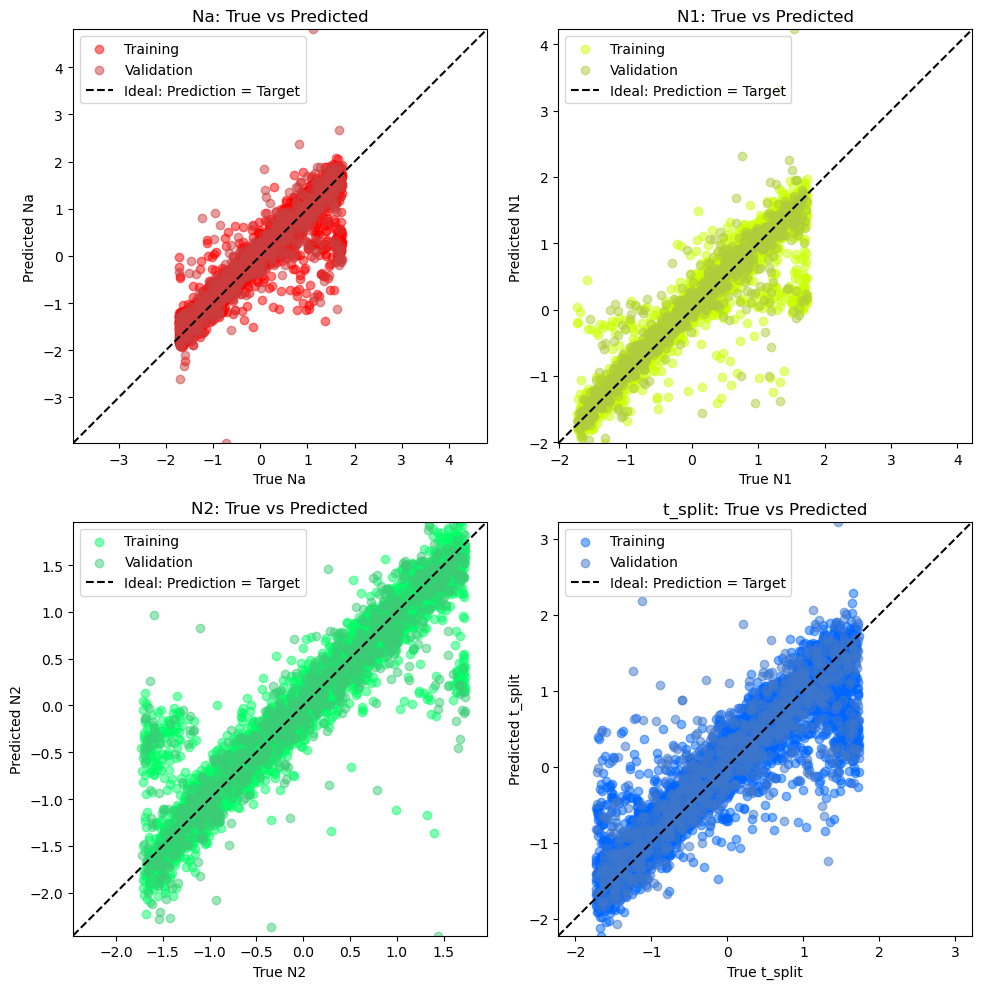

Linear model trained LFG


In [100]:
linear_evaluation(features_and_targets_filepath = features_file, model_directory = model_directory, model_config_path = model_config_file, color_shades_path = color_shades, main_colors_path = main_colors)